In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("../Sample Datasets/marketing_campaign_dataset.csv")

In [3]:
df.shape

(200000, 16)

In [4]:
df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [6]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [7]:
df.tail()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,"$18,365.00",2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,"$8,168.00",4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,"$13,397.00",3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,"$18,508.00",3.86,Houston,French,528,2763,1,Foodies,2021-12-10
199999,200000,Innovate Industries,Social Media,Women 35-44,45 days,Google Ads,0.01,"$13,835.00",6.64,Chicago,Spanish,924,7287,8,Tech Enthusiasts,2021-12-11


In [8]:
df['Acquisition_Cost'] = df['Acquisition_Cost'].str.replace('$', '').str.replace(',', '').astype(float)

In [9]:
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.isnull().sum()

Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

In [12]:
df.describe()

,Campaign_ID,Duration,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,37.503975,0.080070,12504.393040,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,16.746720,0.040602,4337.664545,1.734488,260.019056,2596.864286,2.872581
min,1.000000,15.000000,0.010000,5000.000000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,30.000000,0.050000,8739.750000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,30.000000,0.080000,12496.500000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,45.000000,0.120000,16264.000000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,60.000000,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000


In [13]:
Company_types = df['Company'].unique()
print("Unique Campaign Types: ", Company_types)

Unique Campaign Types:  ['Innovate Industries' 'NexGen Systems' 'Alpha Innovations'
 'DataTech Solutions' 'TechCorp']


In [14]:
campaign_types = df["Campaign_Type"].unique()
print("Unique Campaign Types: ", campaign_types)

Unique Campaign Types:  ['Email' 'Influencer' 'Display' 'Search' 'Social Media']


In [15]:
target_audiences = df["Target_Audience"].unique()
print("Unique Target Audiences: ", target_audiences)

Unique Target Audiences:  ['Men 18-24' 'Women 35-44' 'Men 25-34' 'All Ages' 'Women 25-34']


In [16]:
channels_used = df['Channel_Used'].unique()
print("Unique Channels Used: ", channels_used)

Unique Channels Used:  ['Google Ads' 'YouTube' 'Instagram' 'Website' 'Facebook' 'Email']


In [17]:
languages = df['Language'].unique()
print("Unique Languages: ", languages)

Unique Languages:  ['Spanish' 'German' 'French' 'Mandarin' 'English']


In [18]:
customer_segments = df["Customer_Segment"].unique()
print("Unique Customer Segments: ", customer_segments)

Unique Customer Segments:  ['Health & Wellness' 'Fashionistas' 'Outdoor Adventurers' 'Foodies'
 'Tech Enthusiasts']


In [19]:
df["Company"] = df["Company"].astype('category')
df['Campaign_Type'] = df["Campaign_Type"].astype('category')
df["Target_Audience"] = df["Target_Audience"].astype('category')
df["Channel_Used"] = df["Channel_Used"].astype('category')
df["Language"] = df["Language"].astype('category')
df["Customer_Segment"] = df["Customer_Segment"].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Campaign_ID       200000 non-null  int64         
 1   Company           200000 non-null  category      
 2   Campaign_Type     200000 non-null  category      
 3   Target_Audience   200000 non-null  category      
 4   Duration          200000 non-null  int32         
 5   Channel_Used      200000 non-null  category      
 6   Conversion_Rate   200000 non-null  float64       
 7   Acquisition_Cost  200000 non-null  float64       
 8   ROI               200000 non-null  float64       
 9   Location          200000 non-null  object        
 10  Language          200000 non-null  category      
 11  Clicks            200000 non-null  int64         
 12  Impressions       200000 non-null  int64         
 13  Engagement_Score  200000 non-null  int64         
 14  Cust

Exploratory Data Analysis

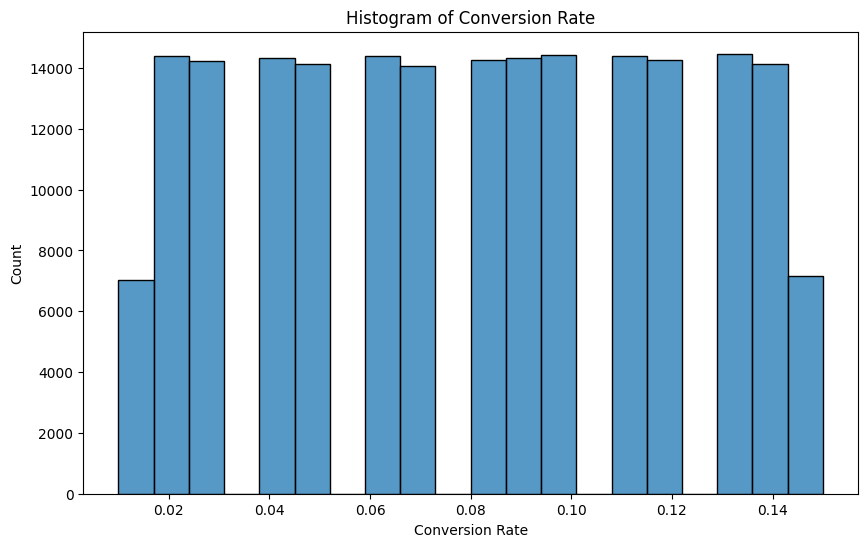

In [21]:
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = "Conversion_Rate", bins = 20)
plt.title("Histogram of Conversion Rate")
plt.xlabel("Conversion Rate")
plt.ylabel("Count")
plt.show()

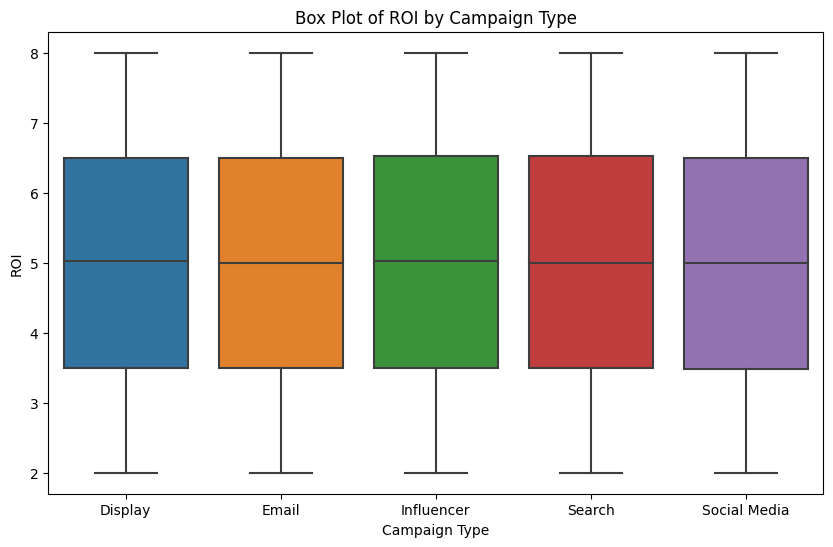

In [22]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = "Campaign_Type", y = "ROI")
plt.title("Box Plot of ROI by Campaign Type")
plt.xlabel("Campaign Type")
plt.ylabel("ROI")
plt.show()

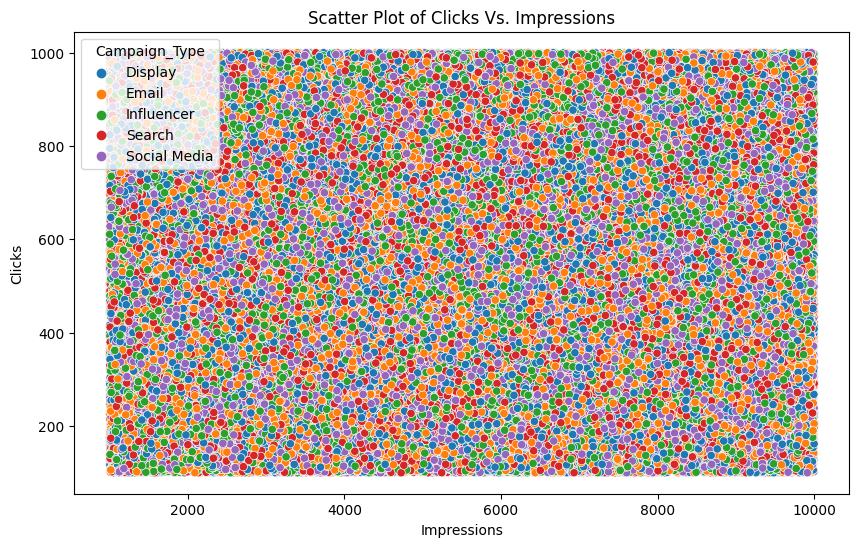

In [23]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = "Impressions", y = "Clicks", hue = "Campaign_Type")
plt.title("Scatter Plot of Clicks Vs. Impressions")
plt.xlabel("Impressions")
plt.ylabel("Clicks")
plt.show()

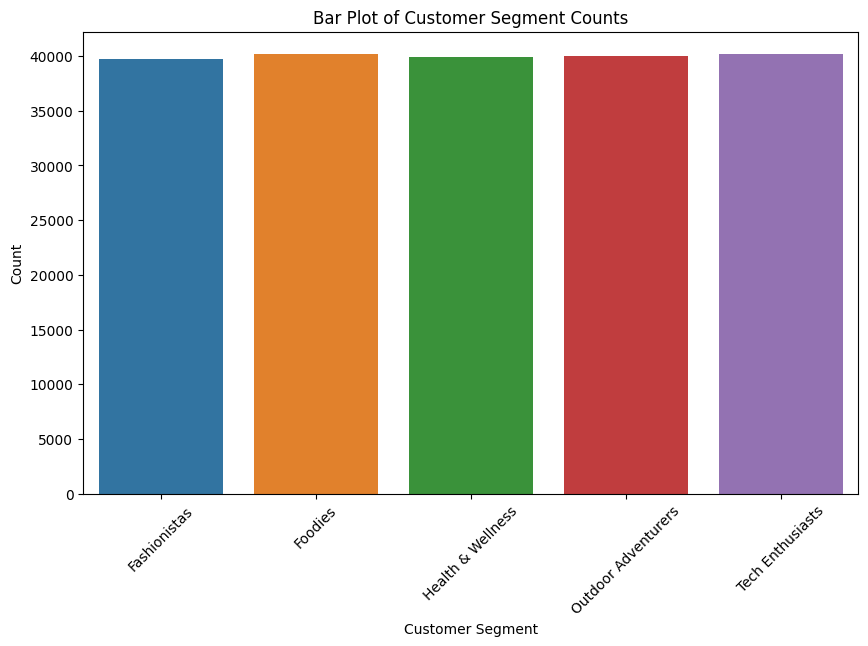

In [24]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = "Customer_Segment")
plt.title("Bar Plot of Customer Segment Counts")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

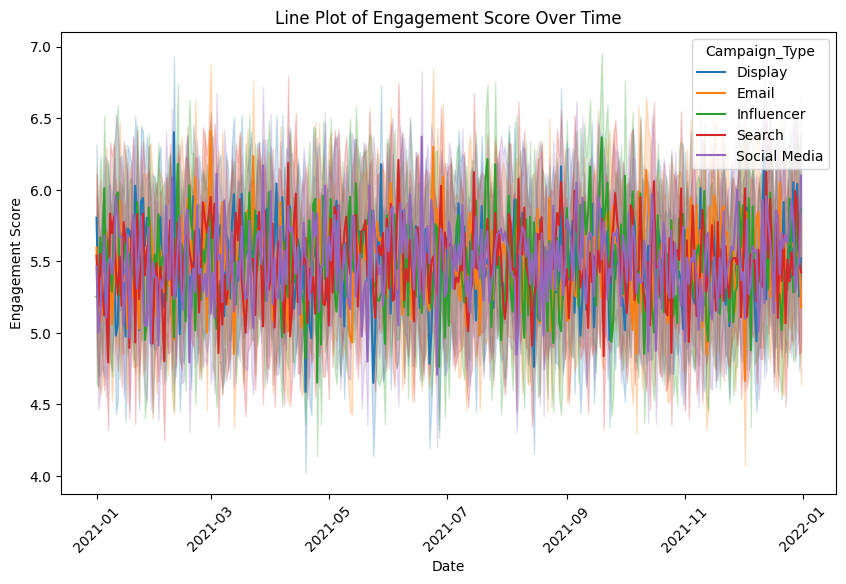

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df_sorted = df.sort_values('Date')
plt.figure(figsize = (10, 6))
sns.lineplot(data = df_sorted, x = "Date", y = "Engagement_Score", hue = "Campaign_Type")
plt.title("Line Plot of Engagement Score Over Time")
plt.xlabel("Date")
plt.ylabel("Engagement Score")
plt.xticks(rotation = 45)
plt.show()

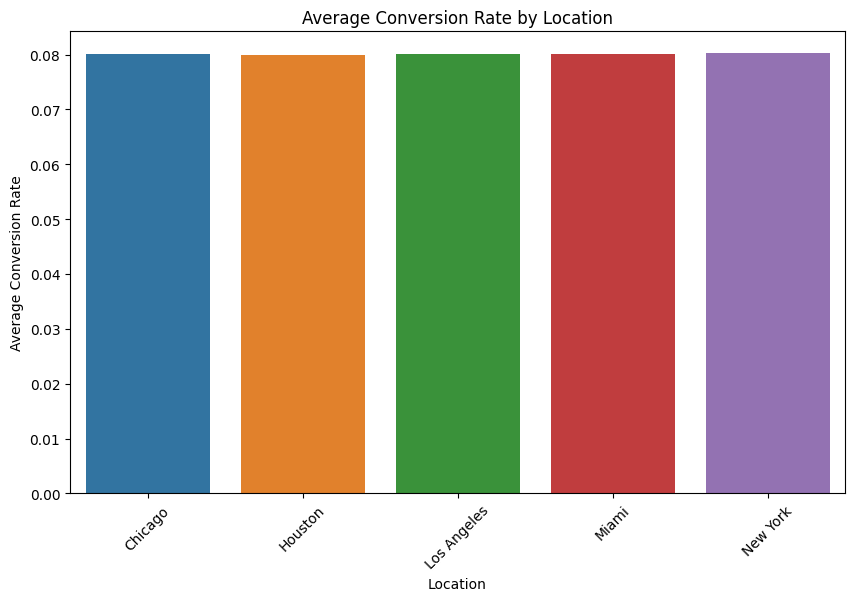

In [26]:
location_conversion = df.groupby("Location")['Conversion_Rate'].mean().reset_index()
plt.figure(figsize = (10, 6))
sns.barplot(data = location_conversion, x = "Location", y = "Conversion_Rate")
plt.title("Average Conversion Rate by Location")
plt.xlabel("Location")
plt.ylabel("Average Conversion Rate")
plt.xticks(rotation = 45)
plt.show()

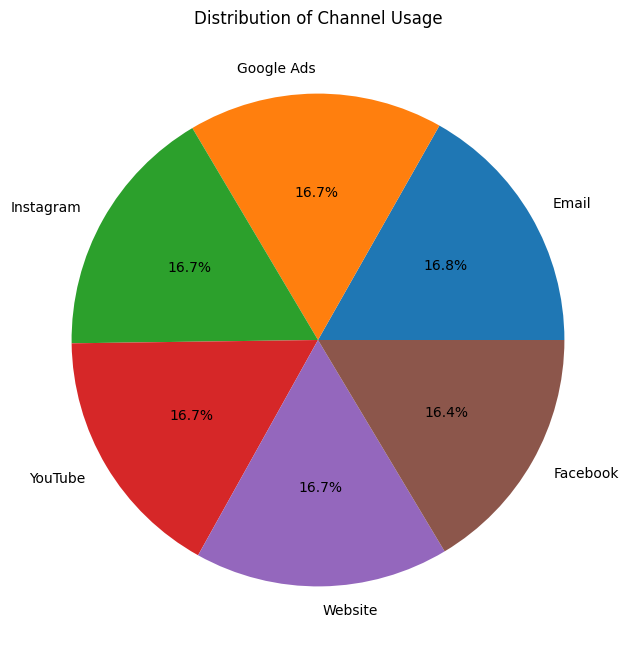

In [27]:
channel_counts = df['Channel_Used'].value_counts()
plt.figure(figsize = (8, 8))
plt.pie(channel_counts, labels = channel_counts.index, autopct = '%1.1f%%')
plt.title("Distribution of Channel Usage")
plt.show()

<Figure size 1000x600 with 0 Axes>

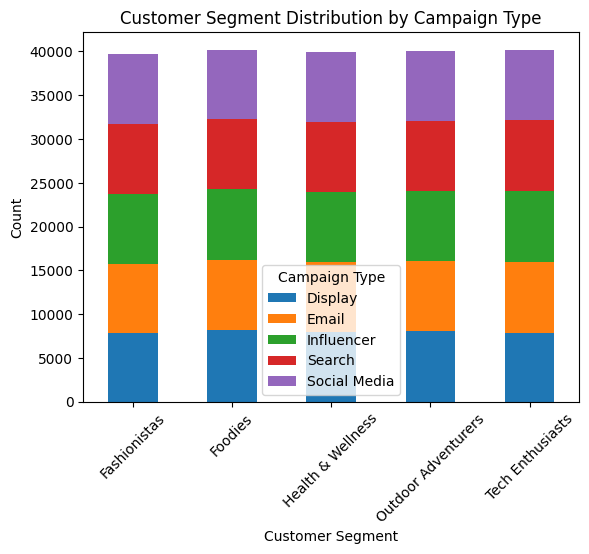

In [28]:
#Customer Segmentation Distribution

segment_campaign = pd.crosstab(df['Customer_Segment'], df['Campaign_Type'])
plt.figure(figsize = (10, 6))
segment_campaign.plot(kind = "bar", stacked = True)
plt.title("Customer Segment Distribution by Campaign Type")
plt.xlabel("Customer Segment")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.legend(title = "Campaign Type")
plt.show()